#Machine Learing Model

This Notebook contains the machine learning model to do with Katey Diniz's Final Project in DATA 301 - Winter 2021 with Dr. Bodwin. 

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [355]:
df_area_grown = pd.read_csv("https://www.dropbox.com/s/5dcdmitmmpo5xkz/df_area_grown.csv?dl=1")
df_area_planted = pd.read_csv("https://www.dropbox.com/s/2zb1l0xm9mv7my7/df_area_planted.csv?dl=1")
df_appplications = pd.read_csv("https://www.dropbox.com/s/xaqt8v0ihpn57w3/df_applications.csv?dl=1")
df_irrigation = pd.read_csv("https://www.dropbox.com/s/9bo2z3acudg4801/df_irrigation.csv?dl=1")
df_Monterey = pd.read_csv("https://www.dropbox.com/s/lexay02c3ijcz6c/df_Monterey.csv?dl=1")
df_SantaCruz = pd.read_csv("https://www.dropbox.com/s/sgmdu3nabaqm4xw/df_SantaCruz.csv?dl=1")
df_SB = pd.read_csv("https://www.dropbox.com/s/x7usc7t360hjq1j/df_SB.csv?dl=1")
df_SLO = pd.read_csv("https://www.dropbox.com/s/85qvvq9bvm0je2j/df_SLO.csv?dl=1")
df_Ventura = pd.read_csv("https://www.dropbox.com/s/0fp2wse2ftj55kf/df_Ventura.csv?dl=1")
df_weather = pd.read_csv("https://www.dropbox.com/s/zgk8q4qk2p2d91r/df_weather.csv?dl=1")
df_yield = pd.read_csv("https://www.dropbox.com/s/7n0t5cmkkbsrshy/df_yield.csv?dl=1") 
#The reason I intially kept them seperate was so that I did not want to lose any data

The goal will be to predict **yield** using a KNN model. The features that will be analyzed are: df_area_planted, df_applications, df_yield & each dataframe for the the top 5 producing counties. 

In [356]:
df_yield = df_yield.drop(columns="Unnamed: 0")

In [357]:
df_yield = df_yield[df_yield['reference_period_desc'] == "YEAR"]
df_yield.year.unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [358]:
df_area_planted = df_area_planted.drop(columns="Unnamed: 0")

In [359]:
df_area_planted = df_area_planted[df_area_planted['reference_period_desc'] == "YEAR"]
df_area_planted.year.unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [360]:
df_area_planted

,reference_period_desc,unit_desc,year,Value
0,YEAR,ACRES,2019,36000
1,YEAR,ACRES,2018,35300
3,YEAR,ACRES,2017,39000
4,YEAR,ACRES,2016,38500
5,YEAR,ACRES,2015,40500
6,YEAR,ACRES,2014,41500
7,YEAR,ACRES,2013,41500
8,YEAR,ACRES,2012,39000
9,YEAR,ACRES,2011,38000
10,YEAR,ACRES,2010,38600


In [361]:
df_appplications = df_appplications.drop(columns="Unnamed: 0")

In [362]:
df_appplications["Data Item"].unique()

array([' MEASURED IN LB', ' MEASURED IN LB / ACRE / APPLICATION, AVG',
       ' MEASURED IN LB / ACRE / YEAR, AVG', ' MEASURED IN NUMBER, AVG'],
      dtype=object)

In [363]:
df_appplications = df_appplications[df_appplications['Data Item'] == " MEASURED IN LB"]
df_appplications_byYear = df_appplications.groupby("Year")["Value"].sum().to_frame()
df_appplications_byYear.index
df_appplications_byYear.reset_index()

,Year,Value
0,1992,15030500.0
1,1994,23430100.0
2,1996,15542800.0
3,1998,20685900.0
4,2000,14299600.0
5,2002,29149700.0
6,2004,7476500.0
7,2006,33052500.0
8,2010,28210700.0
9,2014,34366200.0


In [364]:
df_appsGT0 = df_appplications[df_appplications['Value'] > 0]
df_appsGT0 = df_appsGT0[df_appsGT0["Chemical Name"] != "TOTAL"]
df_appsGT0.groupby("Chemical Name")["Value"].sum().sort_values(ascending=False) #Will see if top Chemicals have an effect on KNN

Chemical Name
NITROGEN                        52590000.0
CHLOROPICRIN = 81501            41213100.0
POTASH                          34340000.0
METHYL BROMIDE = 53201          29883100.0
PHOSPHATE                       25879000.0
                                   ...    
BORAX DECAHYDRATE = 11102            500.0
PYRIPROXYFEN = 129032                300.0
CARFENTRAZONE-ETHYL = 128712         200.0
IRON PHOSPHATE = 34903               100.0
HARPIN PROTEIN = 6477                100.0
Name: Value, Length: 97, dtype: float64

In [365]:
df_hold = df_appplications.groupby(["Chemical Name", "Year"])["Value"].sum().to_frame()
df_hold.reset_index(level=["Chemical Name", "Year"]) #This won't work because it won't line up with other dataframes:(

,Chemical Name,Year,Value
0,ABAMECTIN = 122804,1992,500.0
1,ABAMECTIN = 122804,1994,700.0
2,ABAMECTIN = 122804,1996,800.0
3,ABAMECTIN = 122804,1998,600.0
4,ABAMECTIN = 122804,2000,400.0
...,...,...,...
760,VINCLOZOLIN = 113201,1992,18800.0
761,VINCLOZOLIN = 113201,1994,5000.0
762,VINCLOZOLIN = 113201,1996,21400.0
763,VINCLOZOLIN = 113201,1998,13000.0


In [366]:
df_Monterey.index = pd.to_datetime(df_Monterey["DATE"], format='%Y-%m')
df_Monterey = df_Monterey.dropna()
dateTime = df_Monterey.index
df_Monterey_year = df_Monterey.groupby(dateTime.year)["PRCP", "TMAX", "TAVG", "TMIN"].mean()
df_Monterey_year.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,DATE,PRCP,TMAX,TAVG,TMIN
0,2008,29.326667,19.907222,13.990444,8.074333
1,2009,37.060440,19.996374,14.205714,8.413516
2,2010,51.920238,18.859286,13.699762,8.540119
3,2011,26.161702,19.265319,14.146383,9.026809
4,2012,42.198413,19.313175,13.996508,8.680476
5,2013,9.114737,20.316526,14.104000,7.891474
6,2014,41.724211,21.428316,15.654737,9.880000
7,2015,21.431522,21.490435,15.554130,9.619130
8,2016,44.132955,20.473068,14.833750,9.193636
9,2017,36.543210,21.425926,15.321481,9.215802


In [367]:
df_SLO.index = pd.to_datetime(df_SLO["DATE"], format='%Y-%m')
df_SLO = df_SLO.dropna()
dateTime = df_SLO.index
df_SLO_year = df_SLO.groupby(dateTime.year)["PRCP", "TMAX", "TAVG", "TMIN"].mean()
df_SLO_year.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,DATE,PRCP,TMAX,TAVG,TMIN
0,2008,34.486111,22.996667,15.471944,7.945833
1,2009,30.576316,22.848421,15.324605,7.800263
2,2010,62.084000,21.374667,14.630933,7.887467
3,2011,37.720225,22.340337,15.057865,7.775056
4,2012,37.569388,23.927449,16.190000,8.452449
5,2013,8.400926,24.261296,16.098704,7.935833
6,2014,31.387963,24.659444,16.969907,9.280278
7,2015,20.313542,24.111250,16.545313,8.978854
8,2016,40.264615,23.789846,16.486154,9.181846
9,2017,55.574242,24.034848,16.717121,9.398788


In [368]:
df_SantaCruz.index = pd.to_datetime(df_SantaCruz["DATE"], format='%Y-%m')
df_SantaCruz = df_SantaCruz.dropna()
dateTime = df_SantaCruz.index
df_SantaCruz_year = df_SantaCruz.groupby(dateTime.year)["PRCP", "TMAX", "TAVG", "TMIN"].mean()
df_SantaCruz_year.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,DATE,PRCP,TMAX,TAVG,TMIN
0,2008,49.885417,20.983542,14.174375,7.366042
1,2009,54.464583,20.872083,14.318750,7.765417
2,2010,80.952083,19.972500,13.950208,7.926667
3,2011,40.394118,19.895294,13.857647,7.817059
4,2012,64.176923,21.306410,14.825128,8.342564
5,2013,10.489583,22.507708,14.884375,7.259792
6,2014,64.379167,23.086875,16.104792,9.123750
7,2015,32.680851,23.498085,15.933830,8.366809
8,2016,74.310870,22.010217,15.588696,9.166957
9,2017,108.467500,22.327750,15.290000,8.253750


In [369]:
df_Ventura.index = pd.to_datetime(df_Ventura["DATE"], format='%Y-%m')
df_Ventura = df_Ventura.dropna()
dateTime = df_Ventura.index
df_Ventura_year = df_Ventura.groupby(dateTime.year)["PRCP", "TMAX", "TAVG", "TMIN"].mean()
df_Ventura_year.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,DATE,PRCP,TMAX,TAVG,TMIN
0,2008,15.441509,21.672642,15.886226,10.099811
1,2009,18.825926,22.163704,16.051481,9.937222
2,2010,45.476190,21.425476,15.519524,9.612619
3,2011,23.135294,21.840784,16.026863,10.212549
4,2012,19.696226,22.124528,16.113019,10.100755
5,2013,7.346939,22.631224,16.310612,9.987551
6,2014,24.258696,23.780870,17.464565,11.149565
7,2015,11.340816,24.296122,17.696122,11.095918
8,2016,24.181633,23.579184,17.142041,10.704694
9,2017,36.182000,23.623200,17.258600,10.892600


In [370]:
df_SB.index = pd.to_datetime(df_SB["DATE"], format='%Y-%m')
df_SB = df_SB.dropna()
dateTime = df_SB.index
df_SB_year = df_SB.groupby(dateTime.year)["PRCP", "TMAX", "TAVG", "TMIN"].mean()
df_SB_year.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,DATE,PRCP,TMAX,TAVG,TMIN
0,2008,36.324242,22.643182,15.448788,8.252424
1,2009,25.977778,21.892222,15.258889,8.625417
2,2010,56.036986,20.976164,14.765616,8.556027
3,2011,29.593548,20.804839,14.701774,8.597097
4,2012,24.093103,21.981609,15.351954,8.721264
5,2013,7.864835,22.580769,15.411868,8.242527
6,2014,24.260465,23.985814,16.901279,9.815698
7,2015,9.718293,23.968049,16.830732,9.692927
8,2016,27.528571,23.005595,16.368095,9.730238
9,2017,36.467857,23.067738,16.381548,9.695357


In [371]:
df_merge1 = df_appplications_byYear.merge(df_yield, how='inner', left_on="Year", right_on="year")
df_merge1["Applications"] = df_merge1["Value_x"]
df_merge1["yield"] = df_merge1["Value_y"]
df_merge2 = df_merge1.merge(df_area_planted, how='inner', left_on="year", right_on="year")
df_merge2["Applications"] = df_merge1["Value_x"]
df_merge3 = df_merge2.merge(df_Monterey_year, how='inner', left_on="year", right_on="DATE") #Not enough available Data
df_merge3["Area Planted"] = df_merge2["Value"]
Monterey_train = df_merge3[['year', 'Applications', 'yield', 'PRCP', "TMAX", "TAVG", "TMIN"]]


In [372]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score

In [373]:
# scaling 0: Standardizing
# scaling 1: Min Max
# scaling 2: Max Abs
# selectedMetric: 'minkowski', 'euclidean', 'manhattan', 'chebyshev', 'wminkowski', 'seuclidean', 'mahalanobis' <- change p-features of minkowski too?
def yieldPredictor(features: list, selectedMetric: str, scaling: int, k: int = 2):
  # pipeline and fit our KNN model
  transformer = None
  if scaling == 0:
    transformer = (StandardScaler(), features)
  elif scaling == 1:
    transformer = (MinMaxScaler(), features)
  elif scaling == 2:
    transformer = (MaxAbsScaler(), features)
  
  ct_train = make_column_transformer(
      transformer,
      remainder="drop"
  )
  pipeline = make_pipeline(
      ct_train,
      KNeighborsRegressor(n_neighbors=k, metric=selectedMetric)
  )

  pipeline.fit(X=Monterey_train[features], y=Monterey_train["yield"])

  # do our prediction
  yield_predicted = pipeline.predict(X=Monterey_train[features])

  # get RMSE and R^2
  rmse = np.sqrt(mean_squared_error(Monterey_train["yield"], yield_predicted))
  r2 = r2_score(Monterey_train["yield"], yield_predicted)

  return (rmse, r2)

In [374]:
# physical features 
Features = ["Applications", "TMAX", "PRCP", "TAVG", "TMIN"]

# run our function - outputs RMSE (minimize), R^2 (maximize)
print("Minkowski, StandardScaler:", yieldPredictor(Features, 'minkowski', 0))
print("Minkowski, MinMaxScaler  :", yieldPredictor(Features, 'minkowski', 1))
print("Minkowski, MaxAbsScaler  :", yieldPredictor(Features, 'minkowski', 2))
print("Euclidean, StandardScaler:", yieldPredictor(Features, 'euclidean', 0))
print("Euclidean, MinMaxScaler  :", yieldPredictor(Features, 'euclidean', 1))
print("Euclidean, MaxAbsScaler  :", yieldPredictor(Features, 'euclidean', 2))
print("Manhattan, StandardScaler:", yieldPredictor(Features, 'manhattan', 0))
print("Manhattan, MinMaxScaler  :", yieldPredictor(Features, 'manhattan', 1))
print("Manhattan, MaxAbsScaler  :", yieldPredictor(Features, 'manhattan', 2))

# it looks like the "Euclidean" distance method and "MaxAbsScaler" scaling method
# give the best accuracy (smallest RMSE, largest R^2). 

Minkowski, StandardScaler: (15.155444566227676, 0.4143426294820717)
Minkowski, MinMaxScaler  : (15.155444566227676, 0.4143426294820717)
Minkowski, MaxAbsScaler  : (10.231690964840562, 0.7330677290836654)
Euclidean, StandardScaler: (15.155444566227676, 0.4143426294820717)
Euclidean, MinMaxScaler  : (15.155444566227676, 0.4143426294820717)
Euclidean, MaxAbsScaler  : (10.231690964840562, 0.7330677290836654)
Manhattan, StandardScaler: (17.89727632909544, 0.18326693227091628)
Manhattan, MinMaxScaler  : (17.89727632909544, 0.18326693227091628)
Manhattan, MaxAbsScaler  : (14.252192813739224, 0.4820717131474104)


In [375]:
X_train = Monterey_train[["Applications", "TMAX", "PRCP", "TAVG", "TMIN"]]
y_train = Monterey_train["yield"]
X_test = Monterey_train[["Applications", "TMAX", "PRCP", "TAVG", "TMIN"]] ##I understand this is not the way to run the model, but unfortunately I did not grab data 
y_test = Monterey_train["yield"]                                          ##that worked well to determine Crop Yield Output. 

def modelK(k, errorType):
  
  pipeline = make_pipeline(
      StandardScaler(with_mean=False),
      KNeighborsRegressor(n_neighbors=k, metric='euclidean')
  )

  pipeline.fit(X_train, y_train)
  
  if errorType == 'train':
    y_train_ = pipeline.predict(X_train)
    mse = mean_squared_error(y_train, y_train_)
    rmse = np.sqrt(mse)
    return rmse
  elif errorType == 'test':
    y_test_ = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_test_)
    rmse = np.sqrt(mse)
    return rmse

In [376]:
df_all = pd.DataFrame(list(range(1,4)), columns = ['kVals'])

In [377]:
trainRMSE = []
testRMSE = []
for k in range(1, 4):
  trainRMSE.append(modelK(k, 'train'))
  testRMSE.append(modelK(k, 'test'))

In [378]:
df_train = pd.DataFrame(trainRMSE, columns = ['trainRMSE'])
df_test = pd.DataFrame(testRMSE, columns = ['testRMSE'])
df_all = df_all.merge(df_train, left_index=True, right_index=True)
df_all = df_all.merge(df_test, left_index=True, right_index=True)

Text(0.5, 1.0, 'RMSE vs. K')

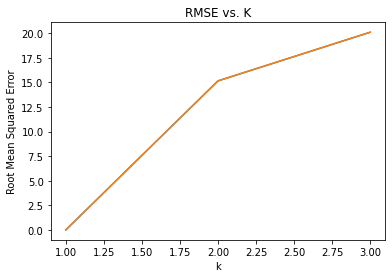

In [379]:
plt.xlabel("k")
plt.ylabel("Root Mean Squared Error")
plt.plot(list(range(1,4)), testRMSE, label="Estimated Test Error")
plt.plot(list(range(1,4)), trainRMSE, label="Estimated Training Error")

plt.title("RMSE vs. K")

K is optimal @ 2 for the data that I have presented. 